# **Fake News Classification**

In this project, we aim to build a machine learning model to classify news articles as real or fake. We will use a dataset that features news articles from 2015 to 2018. The dataset includes various features that can be useful for this task, such as the text of the article and the source of the article.

Our goal is to train a model that can accurately classify a given news article as real or fake based on these features. This could be a valuable tool for news organizations, social media platforms, and the general public in the fight against fake news.

#Importing Libraries

In [2]:
!pip install scikeras
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text,sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing the dataset
fake_df = pd.read_csv('/content/drive/My Drive/AI Final Project/Fake.csv')
real_df = pd.read_csv('/content/drive/My Drive/AI Final Project/True.csv')

#Data Summary

In [4]:
fake_df.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [5]:
real_df.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [6]:
fake_df.shape


(23481, 4)

In [7]:
real_df.shape

(21417, 4)

In [8]:
# Create a summary of dataset attributes
items = [
    [
        col,
        fake_df[col].dtype,
        fake_df[col].nunique(),
        list(fake_df[col].unique()[:3]),
        fake_df[col].isnull().sum()
    ] for col in fake_df
]

# Display the summary in a DataFrame
display(pd.DataFrame(data=items, columns=[
    'Attributes',
    'Data Type',
    'Total Unique',
    'Unique Sample',
    'Total Missing'
]))



,Attributes,Data Type,Total Unique,Unique Sample,Total Missing
0,title,object,17903,[ Donald Trump Sends Out Embarrassing New Year...,0
1,text,object,17455,[Donald Trump just couldn t wish all Americans...,0
2,subject,object,6,"[News, politics, Government News]",0
3,date,object,1681,"[December 31, 2017, December 30, 2017, Decembe...",0


In [9]:
# Create a summary of dataset attributes
items = [
    [
        col,
        real_df[col].dtype,
        real_df[col].nunique(),
        list(real_df[col].unique()[:3]),
        real_df[col].isnull().sum()
    ] for col in real_df
]

# Display the summary in a DataFrame
display(pd.DataFrame(data=items, columns=[
    'Attributes',
    'Data Type',
    'Total Unique',
    'Unique Sample',
    'Total Missing'
]))



,Attributes,Data Type,Total Unique,Unique Sample,Total Missing
0,title,object,20826,"[As U.S. budget fight looms, Republicans flip ...",0
1,text,object,21192,[WASHINGTON (Reuters) - The head of a conserva...,0
2,subject,object,2,"[politicsNews, worldnews]",0
3,date,object,716,"[December 31, 2017 , December 29, 2017 , Decem...",0


#Data Preprocessing


##Data Cleaning

In [10]:
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [11]:
real_df.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [12]:
df = pd.concat([real_df, fake_df]).reset_index(drop = True) #Merging the 2 datasets

**Difference in text**: Under the text column, the beginning of articles in the Real news dataset has a source, unlike the Fake news dataset. They will be removed since they could mislead the model.
Some of the text are also tweets instead of news articles.

In [13]:
df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [15]:
df.isna().sum() # Checking for nan Values

title      0
text       0
subject    0
date       0
dtype: int64

In [16]:
df.title.count()

44898

In [17]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

There are different news subjects/categories in real and fake datasets. Hence, they must be excluded.


In our dataset, each news article is expected to start with the name of the source (or publisher), followed by a hyphen, and then the text of the article. However, some articles do not follow this format.

The code block below is used to identify such articles. It iterates over each article and tries to split the text into two parts at the first occurrence of " -". If the text cannot be split into two parts, or if the first part (assumed to be the source) is 260 characters or longer (else it's possible it is a tweet), the article is assumed to not have a source.

The indices of such articles are stored in the `unknown_publishers` list for further processing.

In [18]:
unknown_publishers = []
for index,row in enumerate(real_df.text.values):
    try:
        record = row.split(" -", maxsplit=1)

        record[1]
        assert(len(record[0]) < 260)
    except:
        unknown_publishers.append(index)

In [19]:
real_df.iloc[unknown_publishers].text

3488     The White House on Wednesday disclosed a group...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s...
8195     Global health officials are racing to better u...
8247     U.S. President Barack Obama visited a street m...
8465     ALGONAC, MICH.—Parker Fox drifted out of the D...
8481     Global health officials are racing to better u...
8482     The following timeline charts the origin and s...
8505     Global health officials are racing to better u...
8506     The following timeline charts the origin and s...
8771     In a speech weighted with America’s complicate...
8970                                                    

In [20]:
real_df.iloc[8970]
#index 8970 has no text

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [21]:
publishers = []
texts = []

for index, row in enumerate(real_df.text.values):
    if index in unknown_publishers:
        # If the article does not have a source, append the entire text to `texts`
        # and append "Unknown" to `publishers`
        texts.append(row)
        publishers.append("Unknown")
    else:
        # If the article has a source, split the text into source and article text
        source, text = row.split(" -", maxsplit=1)
        publishers.append(source)
        texts.append(text)


In [22]:
real_df["publisher"] = publishers
real_df["text"] = texts

del publishers, texts, record, unknown_publishers

In [23]:
#checking for rows with empty text like row: 8970
[index for index,text in enumerate(real_df.text.values) if str(text).strip() == '']

[8970]

In [24]:
real_df.drop(8970, axis=0, inplace=True)

In [25]:
real_df.head(10)

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)
5,"White House, Congress prepare for talks on spe...",The White House said on Friday it was set to ...,politicsNews,"December 29, 2017","WEST PALM BEACH, Fla./WASHINGTON (Reuters)"
6,"Trump says Russia probe will be fair, but time...",President Donald Trump said on Thursday he be...,politicsNews,"December 29, 2017","WEST PALM BEACH, Fla (Reuters)"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,While the Fake News loves to talk about my so...,politicsNews,"December 29, 2017",The following statements were posted to the ve...
8,Trump on Twitter (Dec 28) - Global Warming,"Together, we are MAKING AMERICA GREAT AGAIN! ...",politicsNews,"December 29, 2017",The following statements were posted to the ve...
9,Alabama official to certify Senator-elect Jone...,Alabama Secretary of State John Merrill said ...,politicsNews,"December 28, 2017",WASHINGTON (Reuters)


In [26]:
# checking for empty rows in fake news
empty_fake_index = [index for index,text in enumerate(fake_df.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(empty_fake_index)}")
fake_df.iloc[empty_fake_index].tail()

No of empty rows: 630


,title,text,subject,date
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"
21873,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015"


In [27]:
fake_df['category'] = 0
real_df['category'] = 1

In [28]:
fake_df

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [29]:
real_df

,title,text,subject,date,publisher,category
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",WASHINGTON (Reuters),1
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",WASHINGTON (Reuters),1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",WASHINGTON (Reuters),1
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",WASHINGTON (Reuters),1
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters),1
...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Don...,worldnews,"August 22, 2017",BRUSSELS (Reuters),1
21413,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory a...",worldnews,"August 22, 2017",LONDON (Reuters),1
21414,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories...,worldnews,"August 22, 2017",MINSK (Reuters),1
21415,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Pa...,worldnews,"August 22, 2017",MOSCOW (Reuters),1


## Text Preprocessing

In [30]:
#Combining Title and Text
real_df["text"] = real_df["title"] + " " + real_df["text"]
fake_df["text"] = fake_df["title"] + " " + fake_df["text"]

In [31]:
# Dropping subject because it differs in both datasets
# Dropping date, title and publisher
real_df_new = real_df.drop(["subject", "date","title",  "publisher"], axis=1)
fake_df_new = fake_df.drop(["subject", "date", "title"], axis=1)

In [32]:
df = real_df_new.append(fake_df_new, ignore_index=True)
del real_df_new, fake_df_new

In [33]:
df

,text,category
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
44892,McPain: John McCain Furious That Iran Treated ...,0
44893,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
44894,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
44895,How to Blow $700 Million: Al Jazeera America F...,0


0    23481
1    21416
Name: category, dtype: int64


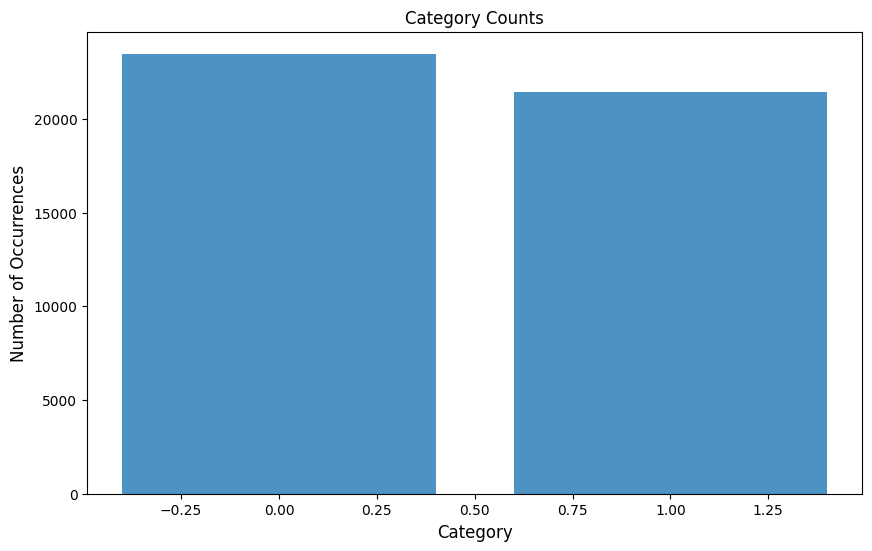

In [34]:
#import matplotlib.pyplot as plt

# Count the number of instances in each category
category_counts = df['category'].value_counts()

print(category_counts)

# Plot the counts
plt.figure(figsize=(10,6))
plt.bar(category_counts.index, category_counts.values, alpha=0.8)
plt.title('Category Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()


#Exploratory Data Analysis

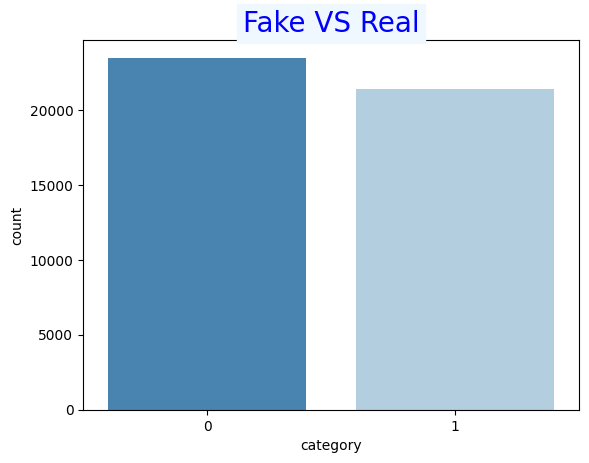

In [35]:
chart=sns.countplot(x='category',data=df,palette='Blues_r')
plt.title("Fake VS Real",
          fontsize='20',
          backgroundcolor='aliceblue',
          color='blue');

<Axes: xlabel='count', ylabel='subject'>

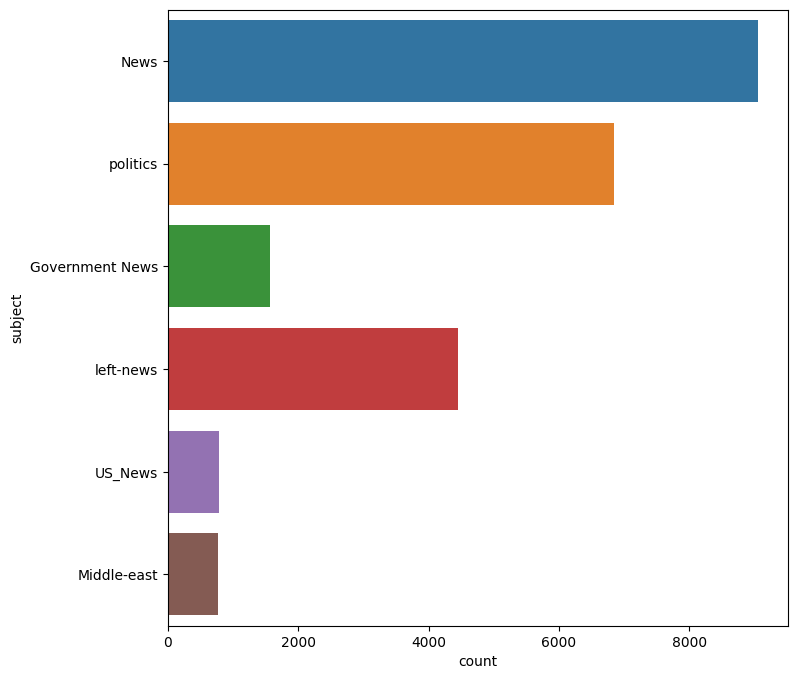

In [36]:
plt.figure(figsize = (8,8))
sns.countplot(y = 'subject',data = fake_df)

<Axes: xlabel='count', ylabel='subject'>

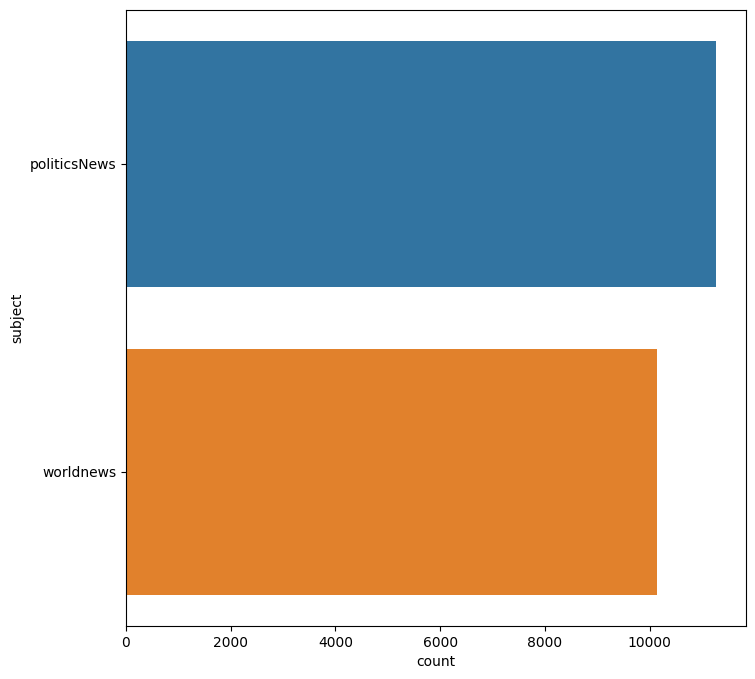

In [37]:
plt.figure(figsize = (8,8))
sns.countplot(y = 'subject',data = real_df)

In [38]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


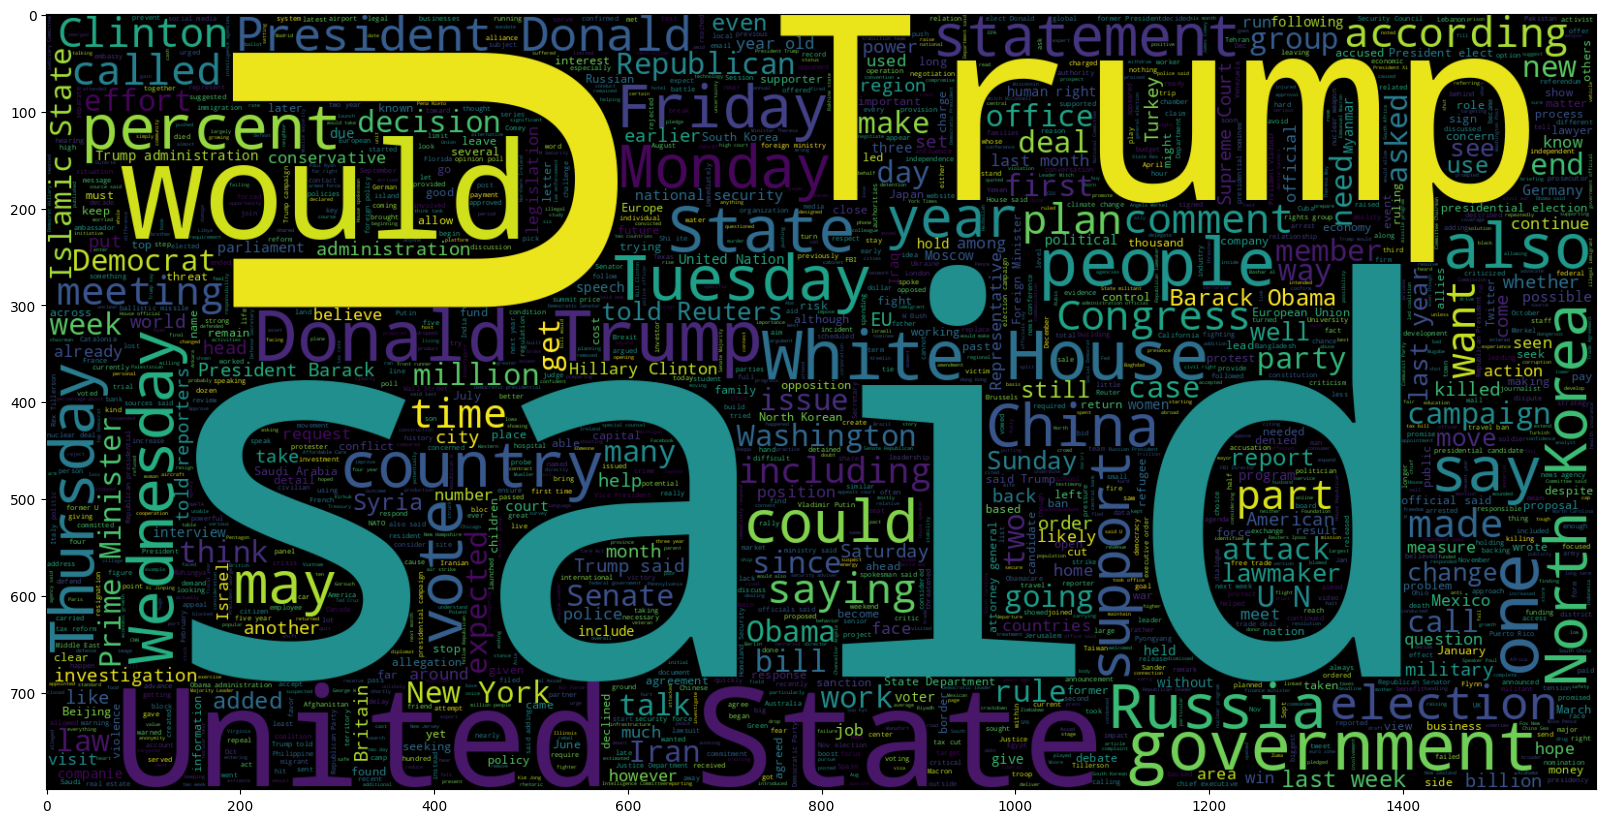

In [39]:
# plot the word cloud for text that is real
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc, interpolation = 'bilinear')

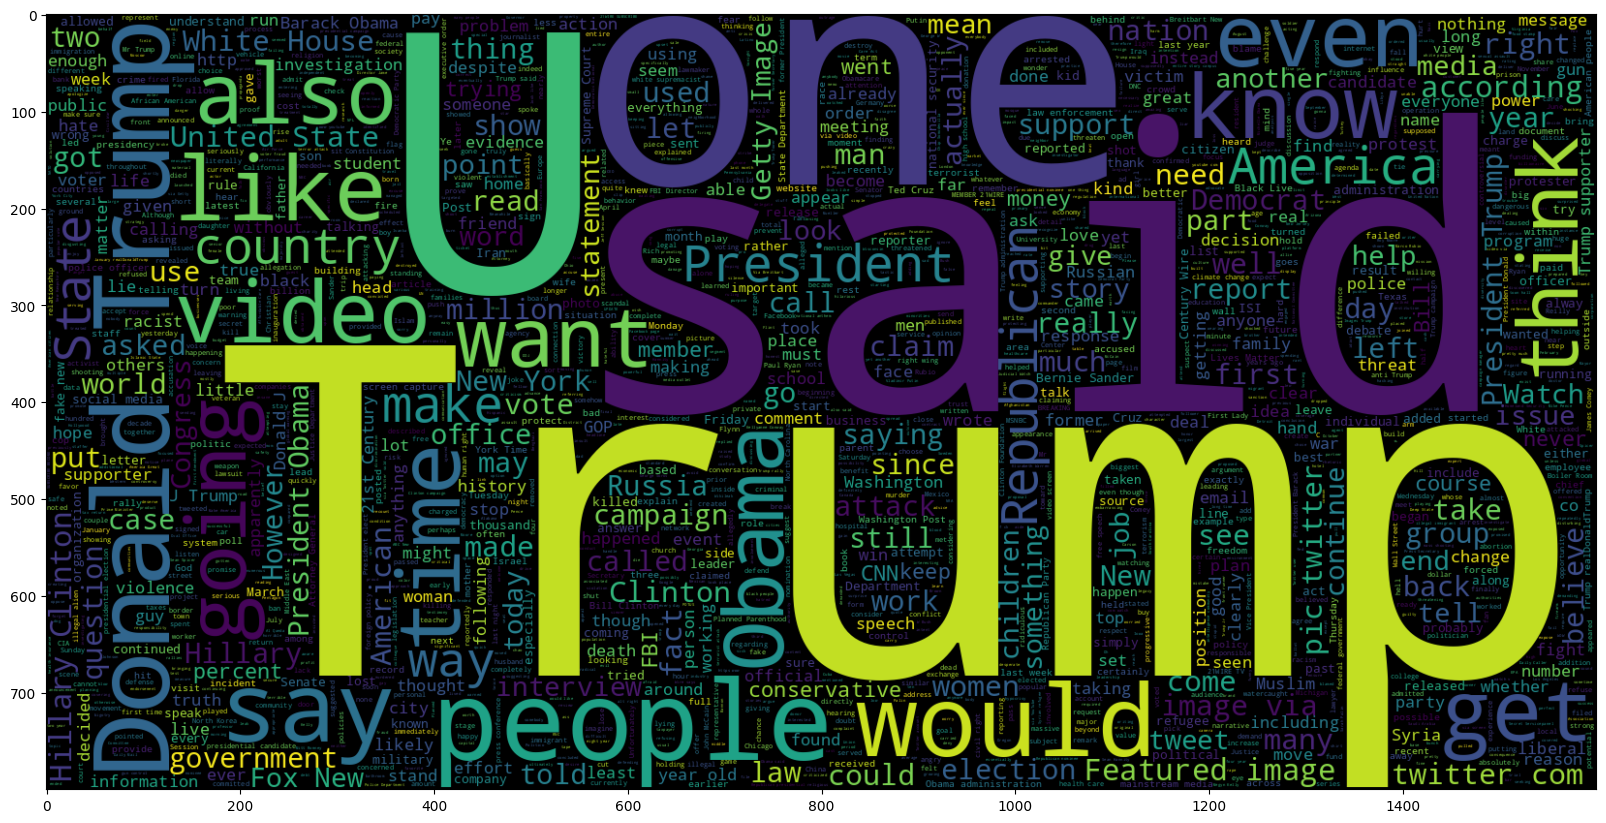

In [40]:
# plot the word cloud for text that is fake
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop).generate(" ".join(df[df.category == 0].text))
plt.imshow(wc, interpolation = 'bilinear')

**N-Gram Analysis**

In [41]:
texts = ' '.join(df['text'])

In [42]:
string = texts.split(" ")

In [43]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

Unigram Analysis

     word   count
0  (the,)  906725
1   (to,)  538450
2     (,)  501295
3   (of,)  441269
4  (and,)  393776


<Axes: xlabel='count', ylabel='word'>

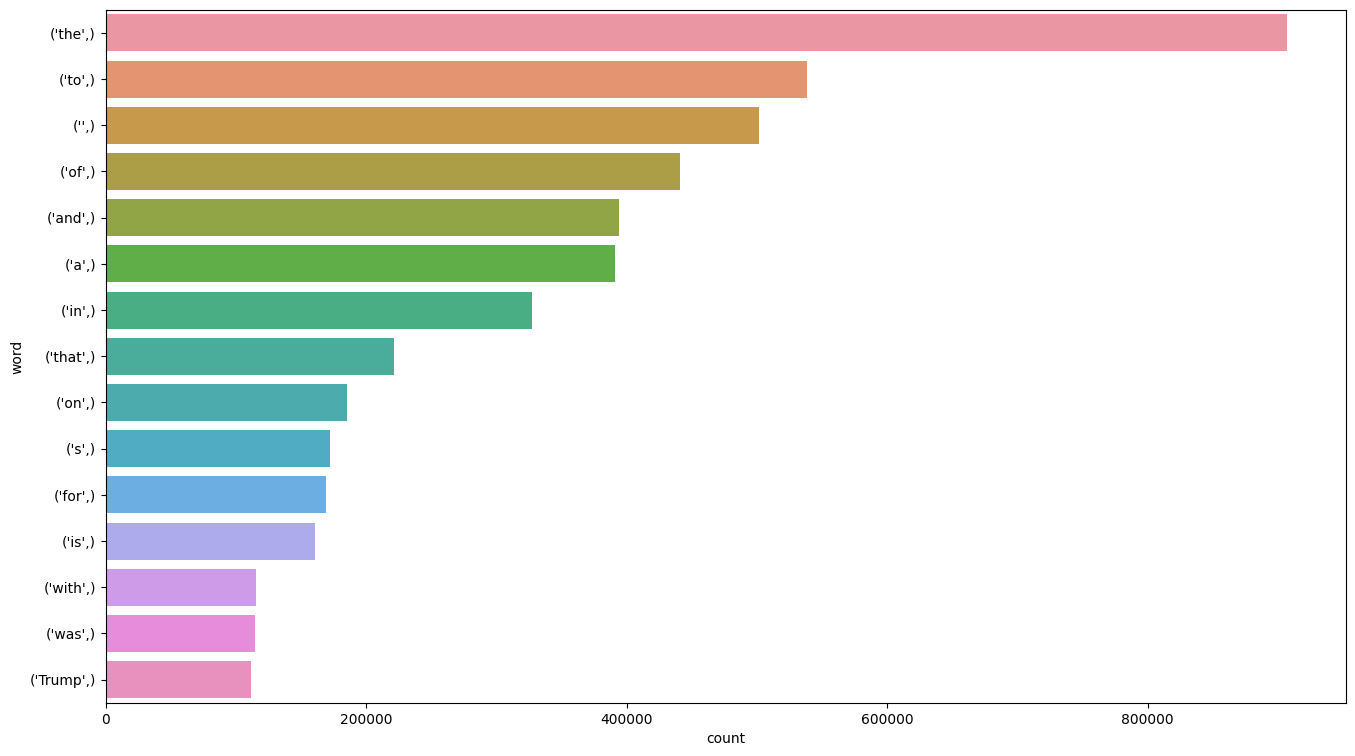

In [44]:
draw_n_gram(string,1)

        word   count
0  (of, the)  100307
1       (, )   83443
2  (in, the)   76669
3  (to, the)   48890
4  (on, the)   33953


<Axes: xlabel='count', ylabel='word'>

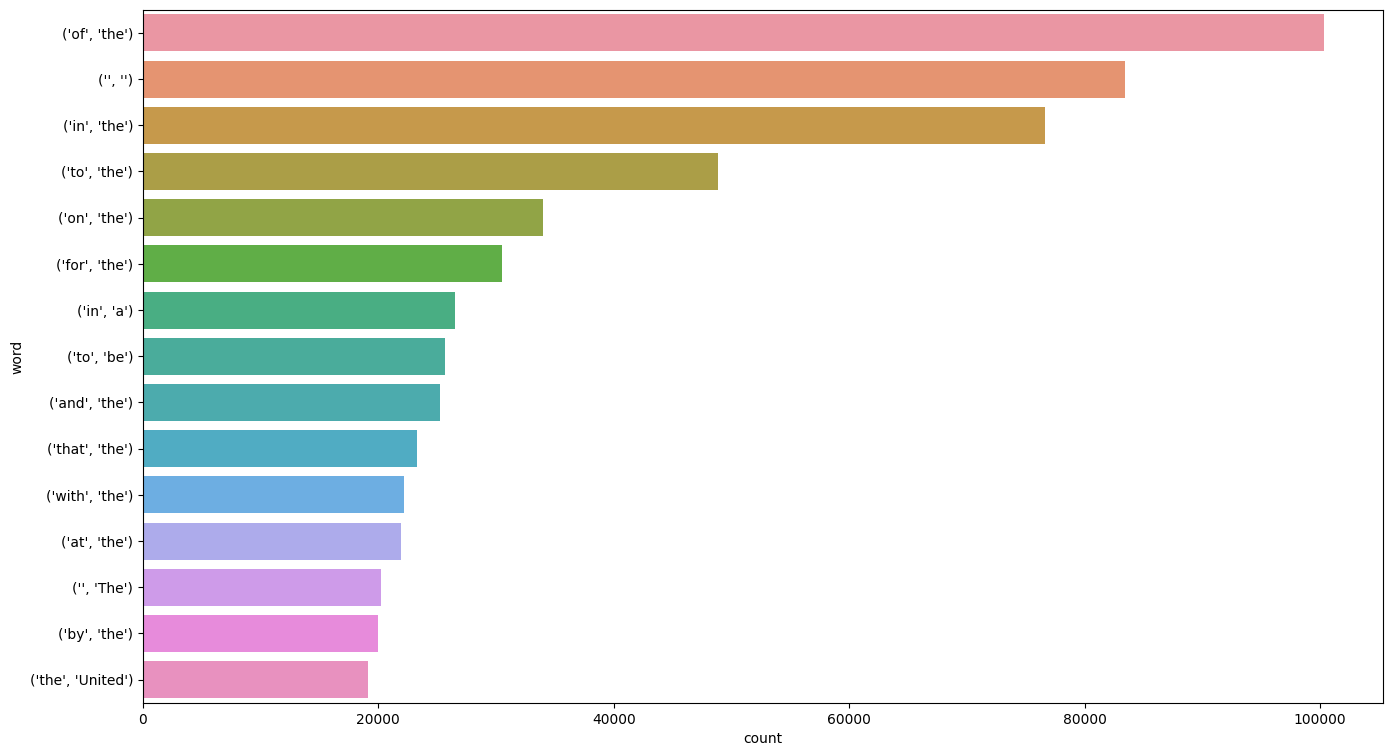

In [45]:
draw_n_gram(string,2)

                    word  count
0                 (, , )  27672
1  (the, United, States)  10764
2          (said, in, a)   6204
3         (one, of, the)   5998
4    (the, White, House)   5554


<Axes: xlabel='count', ylabel='word'>

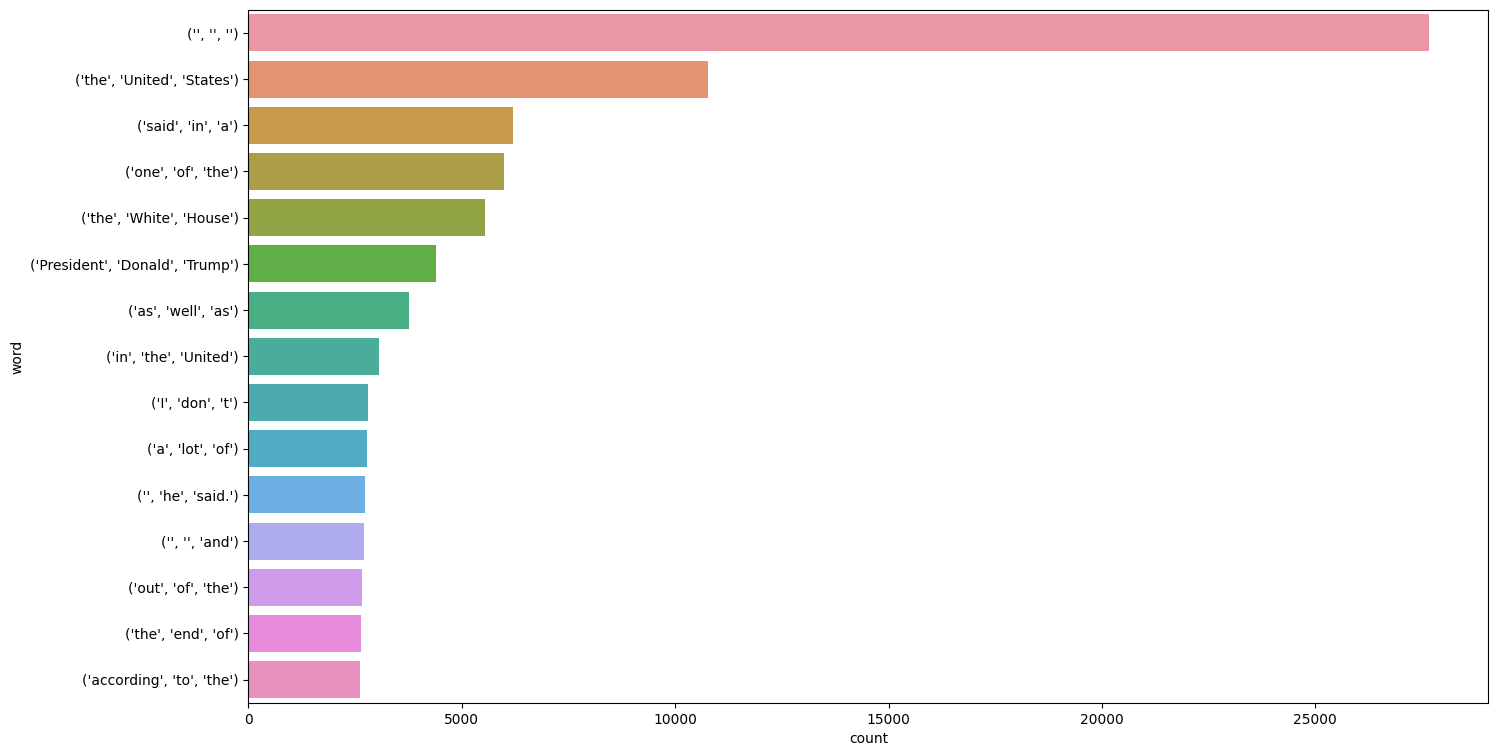

In [46]:
draw_n_gram(string,3)

#More Data Preprocessing

In [47]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

#Removing emoji
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_urls(text)
    text = remove_emoji(text)
    text = remove_special_characters(text)

    return text

In [48]:
#Apply function on review column
df['text']=df['text'].apply(denoise_text)

In [49]:
df


,text,category
0,As US budget fight looms Republicans flip thei...,1
1,US military to accept transgender recruits on ...,1
2,Senior US Republican senator Let Mr Mueller do...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge much more...,1
...,...,...
44892,McPain John McCain Furious That Iran Treated U...,0
44893,JUSTICE Yahoo Settles Email Privacy Classactio...,0
44894,Sunnistan US and Allied Safe Zone Plan to Take...,0
44895,How to Blow 700 Million Al Jazeera America Fin...,0


In [50]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
print(stop_words)

def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    text = re.sub(r'^br$', ' ', text)
    text = re.sub(r'\s+br\s+',' ',text)
    text = re.sub(r'\s+[a-z]\s+', ' ',text)
    text = re.sub(r'^b\s+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result


{'from', 't', 'mightn', 'themselves', 'some', 'didn', 'it', "it's", 'aren', 'own', 'be', 'has', 'of', 'yourself', 'below', 'o', 'she', 'up', 'needn', 'your', 'the', 'above', 'out', 'while', 'himself', 'ma', 'whom', 'itself', "wasn't", 'hers', 'but', 'can', 'shouldn', 'doesn', 'isn', 'are', 'myself', "shan't", 'when', 'hadn', 'if', 'shan', "couldn't", "mustn't", 'for', 'they', 'weren', 'mustn', "should've", 'yourselves', 'our', 'just', 'what', "needn't", 'between', 'until', "aren't", 'how', 'herself', 'an', 'll', 'few', 'those', "shouldn't", 'won', 'was', 'been', "you'd", 'had', 'same', 'who', 'nor', "that'll", "haven't", 'me', 'so', 'ain', 'their', 'them', 'to', 'theirs', 'against', 'm', 'did', "mightn't", 'a', 'doing', 'not', 'don', 'i', 've', "you'll", 'on', 'into', 'most', 'both', 'that', 'here', 'because', "hasn't", 'being', 'as', 'having', 're', 'wouldn', "you've", 'or', "hadn't", 'should', 'd', 's', 'only', 'couldn', 'very', 'there', 'by', 'y', 'after', 'under', 'do', 'him', 'you

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
df['text'] = df['text'].apply(preprocess_text)

In [52]:
df

,text,category
0,"[budget, fight, loom, republican, flip, fiscal...",1
1,"[military, accept, transgender, recruit, monda...",1
2,"[senior, republican, senator, mueller, special...",1
3,"[russia, probe, helped, australian, diplomat, ...",1
4,"[trump, want, postal, service, charge, amazon,...",1
...,...,...
44892,"[mcpain, john, mccain, furious, iran, treated,...",0
44893,"[justice, yahoo, settle, email, privacy, class...",0
44894,"[sunnistan, allied, safe, zone, plan, territor...",0
44895,"[blow, million, jazeera, america, finally, qui...",0


In [53]:
df['text'] = df['text'].apply(lambda x: " ".join(x))
df.head()

,text,category
0,budget fight loom republican flip fiscal scrip...,1
1,military accept transgender recruit monday pen...,1
2,senior republican senator mueller special coun...,1
3,russia probe helped australian diplomat tipoff...,1
4,trump want postal service charge amazon shipme...,1


#Feature Engineering


In [54]:
X = df['text']
y = df['category']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(tokenized_train, maxlen=300)

In [56]:
tokenized_test = tokenizer.texts_to_sequences(X_temp)
X_temp = sequence.pad_sequences(tokenized_test, maxlen=300)

In [57]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Model Training, Test and Evaluation

##LSTM

In [ ]:
def create_model(dropout_rate=0.2, recurrent_dropout_rate=0.2):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=32))
    model.add(LSTM(32, dropout=dropout_rate, recurrent_dropout=recurrent_dropout_rate))
    model.add(Dense(units = 32 , activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model = KerasClassifier(build_fn=create_model, epochs=3, batch_size=64, verbose=1, dropout_rate=0.0, recurrent_dropout_rate=0.0)

In [ ]:
param_grid = {
    'epochs': [3, 5],
    'batch_size': [32, 64]
}


In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, error_score='raise')
# Train the model with validation data
grid_result = grid.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/3
749/749 [==============================] - 43s 50ms/step - loss: 0.2045 - accuracy: 0.9180 - val_loss: 0.1888 - val_accuracy: 0.9296
Epoch 2/3
749/749 [==============================] - 15s 20ms/step - loss: 0.1048 - accuracy: 0.9638 - val_loss: 0.0939 - val_accuracy: 0.9673
Epoch 3/3
375/375 [==============================] - 2s 5ms/step
Epoch 1/3
749/749 [==============================] - 30s 37ms/step - loss: 0.1801 - accuracy: 0.9325 - val_loss: 0.1188 - val_accuracy: 0.9604
Epoch 2/3
749/749 [==============================] - 12s 16ms/step - loss: 0.0906 - accuracy: 0.9703 - val_loss: 0.1080 - val_accuracy: 0.9639
Epoch 3/3
375/375 [==============================] - 2s 5ms/step
Epoch 1/3
749/749 [==============================] - 31s 38ms/step - loss: 0.1806 - accuracy: 0.9325 - val_loss: 0.1063 - val_accuracy: 0.9639
Epoch 2/3
749/749 [==============================] - 13s 17ms/step - loss: 0.0944 - accuracy: 0.9691 - val_loss: 0.1189 - val_accuracy: 0.9559
Epoch 3/3
37

In [ ]:

# Convert to DataFrame
cv_results_df = pd.DataFrame(grid_result.cv_results_)

# Print the DataFrame
print(cv_results_df)


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      75.097054     14.348352         2.908641        0.027087   
1      81.137873      3.917548         3.621881        1.415825   
2      38.034410      6.978328         1.974062        0.626682   
3      40.162773      1.986973         1.376867        0.039275   

  param_batch_size param_epochs                           params  \
0               32            3  {'batch_size': 32, 'epochs': 3}   
1               32            5  {'batch_size': 32, 'epochs': 5}   
2               64            3  {'batch_size': 64, 'epochs': 3}   
3               64            5  {'batch_size': 64, 'epochs': 5}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.974192           0.973522           0.975025         0.974246   
1           0.971436           0.972519           0.975693         0.973216   
2           0.959993           0.957150           0.973856         0.963666   
3      

The grid search results show that the best model was obtained with a batch size of 32 and 3 epochs, achieving a mean test score of approximately 0.974.

In [59]:
lstm_model = create_model(dropout_rate=0.2, recurrent_dropout_rate=0.2)
history = lstm_model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/3
1123/1123 [==============================] - 451s 395ms/step - loss: 0.0590 - accuracy: 0.9810 - val_loss: 0.0815 - val_accuracy: 0.9751
Epoch 2/3
1123/1123 [==============================] - 423s 377ms/step - loss: 0.0535 - accuracy: 0.9827 - val_loss: 0.0760 - val_accuracy: 0.9775
Epoch 3/3
1123/1123 [==============================] - 420s 374ms/step - loss: 0.0501 - accuracy: 0.9842 - val_loss: 0.0744 - val_accuracy: 0.9742


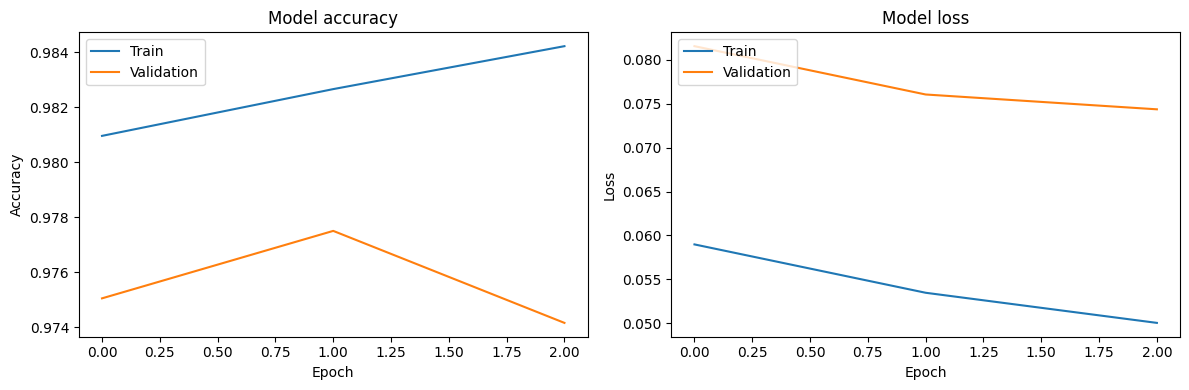

In [60]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

141/141 [==============================] - 26s 185ms/step - loss: 0.0839 - accuracy: 0.9737
Test Loss: 0.08389154076576233
Test Accuracy: 0.9737193584442139


In [ ]:
from sklearn.metrics import roc_auc_score

# Use the model to predict the probabilities of the positive class
y_pred_proba = lstm_model.predict(X_test)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)

# Print the AUC score
print(auc)

141/141 [==============================] - 15s 99ms/step
0.9947321417760134


In [ ]:
#import pickle
#saved_model_lstm = pickle.dumps(lstm_model)

#with open('model_lstm.pkl', 'wb') as file:
#    file.write(saved_model_lstm)


#from google.colab import files

# Download the file to your computer
#files.download('model_lstm.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the tokenizer
#with open('tokenizer_keras.pkl', 'wb') as handle:
#    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

#files.download('tokenizer_keras.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import accuracy_score, classification_report


lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = (lstm_predictions > 0.5).astype(int)  # Adjust for binary classification

# Evaluate LSTM performance
accuracy_lstm = accuracy_score(y_test, lstm_predictions)
classification_report_lstm = classification_report(y_test, lstm_predictions)


141/141 [==============================] - 13s 89ms/step


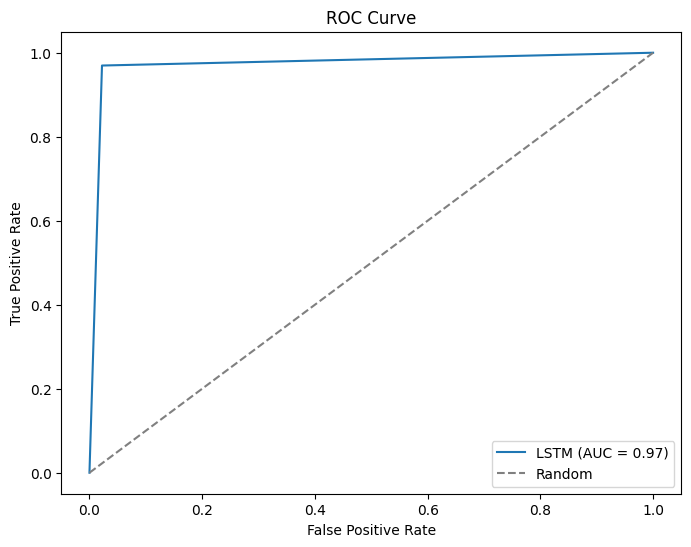

In [ ]:

# Confusion Matrix
conf_matrix_lstm = confusion_matrix(y_test, lstm_predictions)

# ROC Curve

fpr_lstm, tpr_lstm, _ = roc_curve(y_test, lstm_predictions)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


##BERT

In [58]:
!pip install transformers
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch

X = df['text']
y = df['category']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [59]:
X_train

17202    islamic state defeated syrian capital raqqa us...
33388    news voice reason destroys politicized russian...
19196    britain stay single market brexit labour lawma...
3803     intelligence chief clapper comey uneasy trump ...
3566     trump talk trade varied difference remain smil...
                               ...                        
11284    syrian rebel discussing evacuation territory n...
44732    thought police border control want study faceb...
38158    american care facebooks threatening user musli...
860      republican plan deal financial university repu...
15795    draft resolution seek extension syria chemical...
Name: text, Length: 35917, dtype: object

In [60]:
X_temp

19492    final survey zealand vote ruling national keep...
2624     senate rule deal setback republican healthcare...
24655    kellyanne conway private school want want trum...
19546    brexit clock tick offer european capital expec...
37444    brooklyn mother doesnt work shes proudly rapin...
                               ...                        
30956    nancy pelosi awkward brain freeze asked nice t...
16470    trump russia hurting effort north korea nuclea...
21489    watch retired alabama told moore away high sch...
30356    republican bailout foreign company screwed ame...
42578    judge watchdid obama look like kidding time cl...
Name: text, Length: 8980, dtype: object

In [61]:
X_val

41206    obama appointed judge dems critical swing stat...
20919    german content national direction ahead vote s...
36070    awesome turner hammer commie loving hillary be...
4253     connecticut governor malloy seek reelection co...
16814    australia tighten airport security foiled atta...
                               ...                        
24284    trump administration ready dump staffer brand ...
36482    watch video grilling congressman benghazi four...
20755    france macron urge continued turkey french pre...
28817    obama infuriates proving cuban scary communist...
18137    murdoch paper admits hacking fuelling criticis...
Name: text, Length: 4490, dtype: object

In [62]:
# Tokenize and prepare training and validation data
tokenized_train = tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors="pt")
tokenized_val = tokenizer(X_val.tolist(), padding=True, truncation=True, return_tensors="pt")


In [63]:
# Create DataLoader for training and validation data
train_dataset = TensorDataset(tokenized_train['input_ids'], tokenized_train['attention_mask'], torch.tensor(y_train.values))
val_dataset = TensorDataset(tokenized_val['input_ids'], tokenized_val['attention_mask'], torch.tensor(y_val.values))

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [64]:
# Load pre-trained BERT model and create a model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
num_epochs = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# Initialize an empty list to store validation losses
val_losses = []

# Training loop with validation
for epoch in range(num_epochs):
    model.train()
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Validation loop
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            val_loss += outputs.loss.item()

    # Calculate average validation loss for the epoch
    avg_val_loss = val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch + 1}/{num_epochs} - Validation Loss: {avg_val_loss}")

# Plot the validation loss over epochs
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Save the model
model.save_pretrained('/content/drive/My Drive/AI Final Project')

# Save the tokenizer
tokenizer.save_pretrained('/content/drive/My Drive/AI Final Project')


In [ ]:
import pickle


# Save the trained model as a pickle string.
saved_model_bert = pickle.dumps(model)

# Save the pickled model to a file
with open('modelbert.pkl', 'wb') as file:
    file.write(saved_model_bert)



from google.colab import files

# Download the file to your computer
files.download('modelbert.pkl')



In [ ]:
from sklearn.metrics import accuracy_score, classification_report


bert_predictions = model.predict(X_test)
bert_predictions = (bert_predictions > 0.5).astype(int)  # Adjust for binary classification

# Evaluate BERT performance
accuracy_bert = accuracy_score(y_test, bert_predictions)
classification_report_bert = classification_report(y_test, bert_predictions)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
conf_matrix_bert = confusion_matrix(y_test, bert_predictions)
conf_matrix_lstm = confusion_matrix(y_test, lstm_predictions)

# ROC Curve
fpr_bert, tpr_bert, _ = roc_curve(y_test, bert_predictions)
roc_auc_bert = auc(fpr_bert, tpr_bert)

fpr_lstm, tpr_lstm, _ = roc_curve(y_test, lstm_predictions)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_bert, tpr_bert, label=f'BERT (AUC = {roc_auc_bert:.2f})')
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
